<a href="https://colab.research.google.com/github/k3liang/Problematic-Internet-Use-Predictor/blob/main/DataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded=files.upload()

Saving train.csv to train.csv
Saving test.csv to test.csv
Saving sample_submission.csv to sample_submission.csv
Saving data_dictionary.csv to data_dictionary.csv


In [14]:
import pandas as pd
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt

Displaying the Data

In [15]:
df_data = pd.read_csv('data_dictionary.csv')

In [16]:
df_test = pd.read_csv('test.csv')

In [17]:
df_train = pd.read_csv('train.csv')

In [18]:
df_data

,Instrument,Field,Description,Type,Values,Value Labels
0,Identifier,id,Participant's ID,str,NaN,NaN
1,Demographics,Basic_Demos-Enroll_Season,Season of enrollment,str,"Spring, Summer, Fall, Winter",NaN
2,Demographics,Basic_Demos-Age,Age of participant,float,NaN,NaN
3,Demographics,Basic_Demos-Sex,Sex of participant,categorical int,"0,1","0=Male, 1=Female"
4,Children's Global Assessment Scale,CGAS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
...,...,...,...,...,...,...
76,Sleep Disturbance Scale,SDS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
77,Sleep Disturbance Scale,SDS-SDS_Total_Raw,Total Raw Score,int,NaN,NaN
78,Sleep Disturbance Scale,SDS-SDS_Total_T,Total T-Score,int,NaN,NaN
79,Internet Use,PreInt_EduHx-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN


In [19]:
df_data.shape

(81, 6)

In [20]:
df_test

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.00,50.8,...,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.00,46.0,...,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.50,75.6,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.00,81.6,...,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.50,112.2,...,63.1265,NaN,NaN,Spring,4.110,Summer,40.0,56.0,Spring,0.0
6,0038ba98,Fall,10,0,NaN,NaN,Fall,19.660760,55.00,84.6,...,47.2211,NaN,NaN,Winter,3.670,Winter,27.0,40.0,Fall,3.0
7,0068a485,Fall,10,1,NaN,NaN,Fall,16.861286,59.25,84.2,...,50.4767,NaN,NaN,Fall,1.270,NaN,NaN,NaN,Fall,2.0
8,0069fbed,Summer,15,0,NaN,NaN,Spring,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.0
9,0083e397,Summer,19,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df_test.shape

(20, 59)

In [22]:
df_train

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3956,ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,0.0,NaN
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0
3958,ffed1dd5,Spring,13,0,Spring,70.0,Winter,12.235895,70.7,87.0,...,1.0,1.0,1.0,19.0,Spring,33.0,47.0,Spring,1.0,0.0


In [23]:
df_train.shape

(3960, 82)

Displaying the Types of the Data

In [24]:
df_data.dtypes
#the element in the 0th row of each column is of type 'object'

,0
Instrument,object
Field,object
Description,object
Type,object
Values,object
Value Labels,object


In [25]:
df_train.dtypes
#many of the elements in the 0th row of each column are numerical data of type 'int' or 'float'

,0
id,object
Basic_Demos-Enroll_Season,object
Basic_Demos-Age,int64
Basic_Demos-Sex,int64
CGAS-Season,object
...,...
SDS-SDS_Total_Raw,float64
SDS-SDS_Total_T,float64
PreInt_EduHx-Season,object
PreInt_EduHx-computerinternet_hoursday,float64


In [26]:
df_test.dtypes
#most of the elements in the 0th row of each column are numerical data of type 'int' or 'float'

,0
id,object
Basic_Demos-Enroll_Season,object
Basic_Demos-Age,int64
Basic_Demos-Sex,int64
CGAS-Season,object
CGAS-CGAS_Score,float64
Physical-Season,object
Physical-BMI,float64
Physical-Height,float64
Physical-Weight,float64


Examining the Training Data

In [27]:
df_train['Physical-BMI'].unique()

array([16.87731569, 14.03559028, 16.64869606, ..., 18.76467814,
       21.4415    , 12.23589524])

<Axes: xlabel='Physical-BMI', ylabel='sii'>

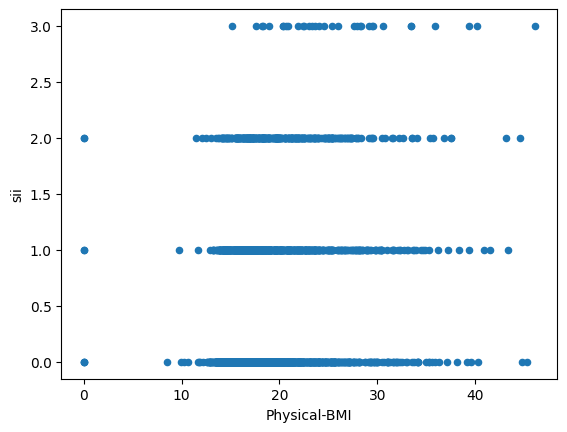

In [28]:
df_train.plot(kind='scatter',x='Physical-BMI',y='sii')
#creating a scatterplot of 'Physical-BMI' against 'sii'

Note in the above graph that no correlation between Physical-BMI and sii is immediately obvious, as for each sii level, the Physical-BMI ranges between the same range of 10 to 40, with little variation, although any variation that does appear may be attributed to biases within the data itself. For instance, while a takeaway from this plot might be that people within the Physical-BMI range of 10-40 are least likely to have an sii of 3.0, this could also be attributed to the fact that there are signicantly fewer instances of sii of 3.0 in the data compared to every other sii level, which we will notice later on.

One takeaway I have from this plot is that even though the sii index of
2.0 has fewer instances within the data than the index of 1.0 (as we will see later on), for the sii index of 2.0, a notable amount more of data is closer to the BMI value of 10 than for the index of 1.0, which could be an indication of a correlation.

We will now examine the relationship between other features and sii via the scatterplot.

<Axes: xlabel='Basic_Demos-Age', ylabel='sii'>

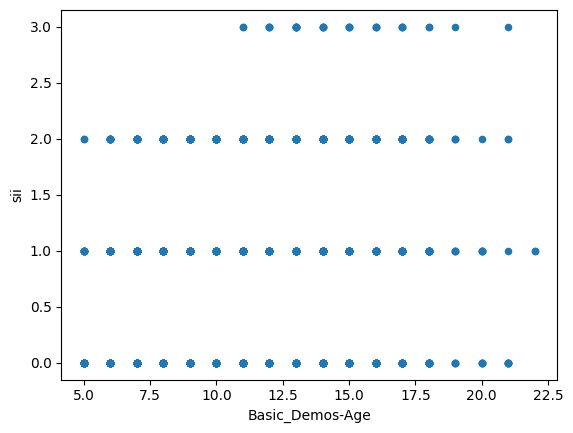

In [29]:
df_train.plot(kind='scatter',x='Basic_Demos-Age',y='sii')

Again in this above plot, no immediate correlation is obvious. Notably, the sii index of 1.0 has the highest maximum Basic_Demos-Age value, which may or may not be coincidental.

<Axes: xlabel='CGAS-CGAS_Score', ylabel='sii'>

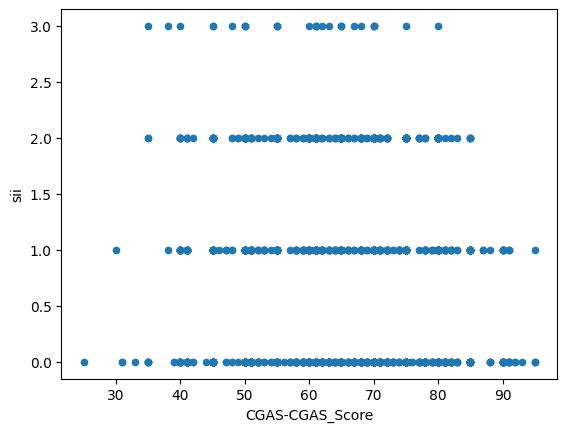

In [30]:
df_train.plot(kind='scatter',x='CGAS-CGAS_Score',y='sii')

The maximum CGAS-CGAS_Score for the sii index of 2.0 is less than that for 1.0 or 0.0, but this could be due to the fact that there are fewer instances of index 2.0 in the data.



Additionally, every value within the range of CGAS-CGAS_Score between about 47 to 83 had a corresponding sii index of 0.0, which is not the case for any other sii index. But again, this is likely due to the majority of the sii index of 0.0 compared to any other index within the data.

In fact, this is what we will check next.

<Axes: ylabel='Frequency'>

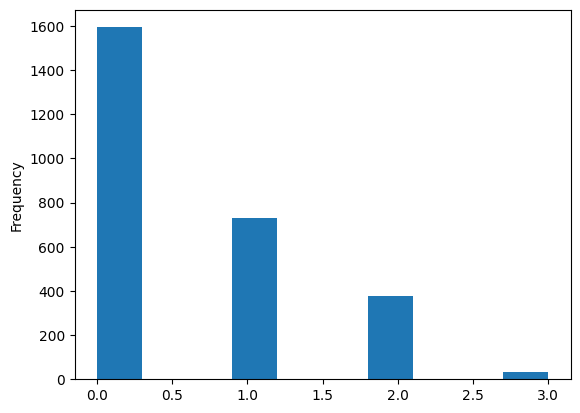

In [31]:
df_train['sii'].plot(kind='hist')

As shown in the above plot, there are significantly more data with 0.0 as the recorded sii index than any other index, and significantly fewer data with 3.0 as the recorded sii index than any other index.

We will use a scatterplot to find a correlation between one more feature and sii below.

<Axes: xlabel='Physical-Weight', ylabel='sii'>

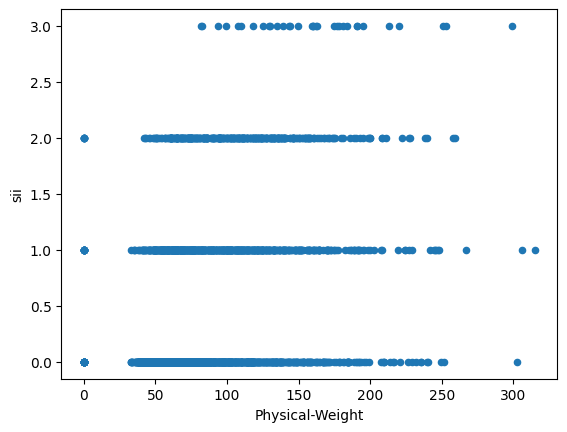

In [68]:
df_train.plot(kind='scatter',x='Physical-Weight',y='sii')

Again, there is no immediately obvious correlation, except possibly that for the sii value of 2.0, the minimum positive Physical-Weight is higher than that for 1.0 or 0.0.

In [69]:
df_train.shape

(3960, 82)

Below we will create a boxplot for four of the features, including sii, to measure the structure of the data representing them. They are currently at different scales, so we will first normalize all of them to make it easier to compare them.

<Axes: xlabel='variable', ylabel='value'>

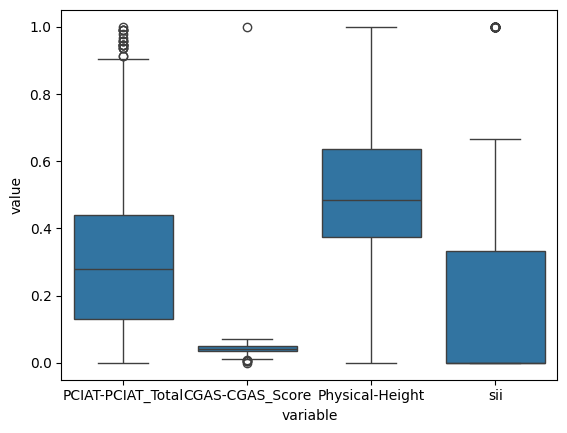

In [70]:
col1 = (df_train['PCIAT-PCIAT_Total']-df_train['PCIAT-PCIAT_Total'].min())/(df_train['PCIAT-PCIAT_Total'].max()-df_train['PCIAT-PCIAT_Total'].min())
col2 = (df_train['CGAS-CGAS_Score']-df_train['CGAS-CGAS_Score'].min())/(df_train['CGAS-CGAS_Score'].max()-df_train['CGAS-CGAS_Score'].min())
col3 = (df_train['Physical-Height']-df_train['Physical-Height'].min())/(df_train['Physical-Height'].max()-df_train['Physical-Height'].min())
col4 = (df_train['sii']-df_train['sii'].min())/(df_train['sii'].max()-df_train['sii'].min())

df_train_simple = pd.DataFrame({'PCIAT-PCIAT_Total':col1, 'CGAS-CGAS_Score':col2, 'Physical-Height':col3, 'sii':col4})
df_train_simple_melted = pd.melt(df_train_simple)

sns.boxplot(x='variable',y='value',data=df_train_simple_melted)


In this plot, some notable things are that the range of the CGAS-CGAS_Score is very narrow compared to the other features. Additionally, every feature contains outliers, except for Physical-Height. And this plot also supports the idea that the amount of data with sii index of 0.0 is much larger than for any other index, since at least 25% of the data is just 0.0. In fact given that the maximum value of the 'sii' column is actually 3.0, the fact that there are outliers for the 'sii' feature shows just how uncommon the 3.0 value for sii is within the dataset.


We will now create a heatmap to check the correlation coefficients between particular features and sii. Recall that correlation coefficients whose magnitude is closest to 1 indicate the best correlations between features.

In [77]:
df_train['sii'].max()

3.0

<Axes: >

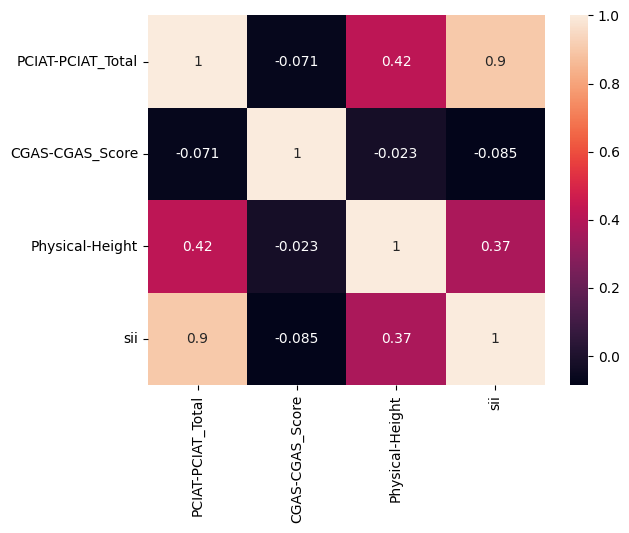

In [71]:
sns.heatmap(df_train_simple.corr(),annot=True)

In the above plot, the highest magnitude correlation coefficient between sii and another feature is 0.9, corresponding to PCIAT-PCIAT_Total. The reason this sii value is so high is because, by design, the sii value is totally derived from PCIAT-PCIAT_Total, as outlined on the website.

Examine the following scatterplot between these two features:

<Axes: xlabel='PCIAT-PCIAT_Total', ylabel='sii'>

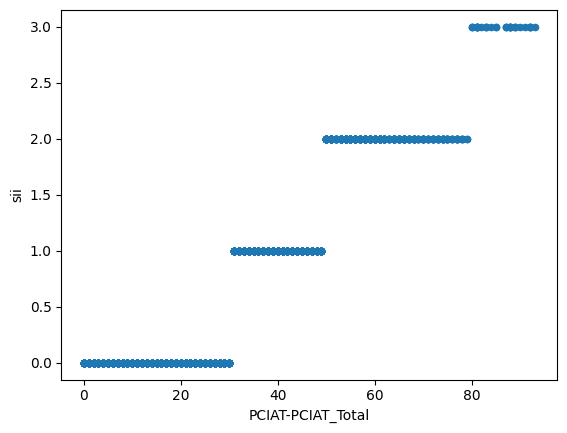

In [72]:
df_train.plot(kind='scatter',x='PCIAT-PCIAT_Total',y='sii')

The website states that the sii value of 0 was assigned for none, 1 for mild, 2 for moderate, and 3 for severe. From the plot, it appears that the PCIAT-PCIAT_Total value between 0 and 30 corresponds to none, 30-50 corresponds to mild, 50-80 corresponds to moderate, and 80 or higher corresponds to severe.

From the heatmap, the second best correlation is Physical-Height, with a coefficient of 0.37, which is not particularly strong.

We will try to find the maximum absolute value correlation coefficient between any feature and 'sii'

In [36]:
df_train.columns

Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST'

We will use label encoding to convert all strings to numerical data. We will also remove all of the PCIAT columns, from which the 'sii' was directly determined.

In [46]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

le = LabelEncoder()
df_label = df_train.apply(le.fit_transform)

df_label = df_label.drop(columns=['PCIAT-Season','PCIAT-PCIAT_01','PCIAT-PCIAT_02','PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06','PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10','PCIAT-PCIAT_11', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14','PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18', 'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20', 'PCIAT-PCIAT_Total'],axis=1)

corr_matrix = df_label.corr()

np.fill_diagonal(corr_matrix.values, 0)

target_correlations = corr_matrix['sii']

target_correlations

# Find the highest correlation (excluding self-correlation)
#max_corr = abs(target_correlations).max()
#feature_with_max_corr = target_correlations.idxmax()
#feature_with_max_corr = target_correlations.drop('sii').idxmax()

#print(max_corr)
#print(feature_with_max_corr)

,sii
id,0.002908
Basic_Demos-Enroll_Season,0.064181
Basic_Demos-Age,0.185186
Basic_Demos-Sex,-0.007278
CGAS-Season,0.496971
CGAS-CGAS_Score,0.558388
Physical-Season,0.310131
Physical-BMI,0.444036
Physical-Height,0.468289
Physical-Weight,0.515542


0.755 is not a particularly low correlation coefficient, a great improvement from the 0.37 before. Furthermore, this coefficient comes from the SDS-SDS_Total_Raw feature, which measures sleep disturbance. Unlike the PCIAT variables, the 'sii' index was not directly extracted from this feature. As a result, this is more insightful.